In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.naive_bayes import MultinomialNB
import re
import tkinter as tk
from tkinter import messagebox
import time


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Compulap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Compulap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
df =  pd.read_csv(r"D:\enron_dataset.csv", encoding='ISO-8859-1')
print(df.shape)
df.head()

(33715, 2)


,text,label
0,Subject: dobmeos with hgh my energy level has ...,spam
1,Subject: your prescription is ready . . oxwq s...,spam
2,Subject: get that new car 8434\npeople nowthe ...,spam
3,"Subject: await your response\ndear partner ,\n...",spam
4,"Subject: coca cola , mbna america , nascar par...",spam


Change the text & label columns as class and Message

In [50]:

df.rename(columns={"text": "Message", "label": "class"}, inplace=True)

In [51]:
df.isnull().sum()

Message    0
class      0
dtype: int64

In [52]:
df.duplicated().sum()

3222

In [53]:
data = df.drop_duplicates(keep='first')

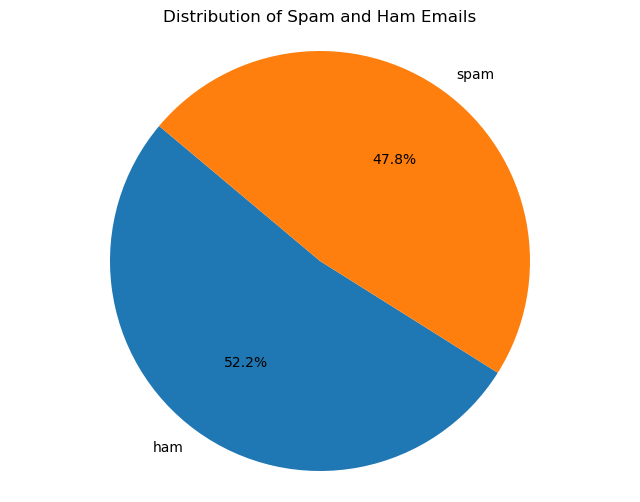

In [54]:
data['class'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['class'].value_counts(), labels=data['class'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Ham Emails')
plt.axis('equal')
plt.show()

Ham=1
spam=0

In [55]:
df.loc[df["class"]=='ham',"class",]=1
df.loc[df["class"]=='spam',"class",]=0
df.head()

,Message,class
0,Subject: dobmeos with hgh my energy level has ...,0
1,Subject: your prescription is ready . . oxwq s...,0
2,Subject: get that new car 8434\npeople nowthe ...,0
3,"Subject: await your response\ndear partner ,\n...",0
4,"Subject: coca cola , mbna america , nascar par...",0


In [56]:
df_x=df["Message"]
df_y=df["class"]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

Etract text and space only 

In [58]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    matches = re.findall(r'[a-z\s]+', text)
    cleaned_text = ' '.join(matches)
    return cleaned_text
x_train_cleaned = [clean_text(email) for email in x_train]
x_test_cleaned = [clean_text(email) for email in x_test]
print(x_train_cleaned[0])
print(x_test_cleaned[0])

subject  risk offsite team notes   example letter
sally
here are the notes from each of the four breakout teams and a draft letter
for you to expand to send to the organization in follow   up to the offsite  
please have patti proof the notes before sending   i hope your visit to
london went well   i will be around most of this coming week   i received
your call mary and i will talk at length today  
regards to all
tom
  operational risk offsite jan     doc
subject  notice   ebay registration suspension   breach of user agreement  
ebay
suspension
need
help  
dear valued ebay member   we regret to inform you that your
ebay account has been suspended due to concerns we have for the safety and
integrity of the ebay community   per the user agreement   section    
we may immediately issue a warning   temporarily suspend   indefinitely
suspend or terminate your membership and refuse to provide our services to
you if we believe that your actions may cause financial loss or legal
liability f

word tokenization

In [59]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() # create an object of the WordNetLemmatizer
def preprocess_text(text):
    text = str(text).lower()  
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words] # remove punctuation and stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # lemmatize the words
    return tokens


filtered_X_train = [preprocess_text(email) for email in x_train_cleaned]
filtered_X_test = [preprocess_text(email) for email in x_test_cleaned]

print(filtered_X_train[0])
print(filtered_X_test[0])

['subject', 'risk', 'offsite', 'team', 'note', 'example', 'letter', 'sally', 'note', 'four', 'breakout', 'team', 'draft', 'letter', 'expand', 'send', 'organization', 'follow', 'offsite', 'please', 'patti', 'proof', 'note', 'sending', 'hope', 'visit', 'london', 'went', 'well', 'around', 'coming', 'week', 'received', 'call', 'mary', 'talk', 'length', 'today', 'regard', 'tom', 'operational', 'risk', 'offsite', 'jan', 'doc']
['subject', 'notice', 'ebay', 'registration', 'suspension', 'breach', 'user', 'agreement', 'ebay', 'suspension', 'need', 'help', 'dear', 'valued', 'ebay', 'member', 'regret', 'inform', 'ebay', 'account', 'suspended', 'due', 'concern', 'safety', 'integrity', 'ebay', 'community', 'per', 'user', 'agreement', 'section', 'may', 'immediately', 'issue', 'warning', 'temporarily', 'suspend', 'indefinitely', 'suspend', 'terminate', 'membership', 'refuse', 'provide', 'service', 'believe', 'action', 'may', 'cause', 'financial', 'loss', 'legal', 'liability', 'user', 'u', 'may', 'al

In [74]:
X_train= [' '.join(tokens) for tokens in filtered_X_train] 
X_test= [' '.join(tokens) for tokens in filtered_X_test] 
print(X_train[0])
print(X_test[0])


subject risk offsite team note example letter sally note four breakout team draft letter expand send organization follow offsite please patti proof note sending hope visit london went well around coming week received call mary talk length today regard tom operational risk offsite jan doc
subject notice ebay registration suspension breach user agreement ebay suspension need help dear valued ebay member regret inform ebay account suspended due concern safety integrity ebay community per user agreement section may immediately issue warning temporarily suspend indefinitely suspend terminate membership refuse provide service believe action may cause financial loss legal liability user u may also take action unable verify authenticate information provide u due suspension account please advised prohibited using ebay way includes update actual account could please take minute online experience update personal record run future problem online service please update record th june updated account

convert text to vectors 

In [75]:
vectorizer = TfidfVectorizer(max_features=900) 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [76]:
a=X_train_tfidf.toarray()
b=X_test_tfidf.toarray()


In [77]:
y_train=y_train.astype('int')
y_train

27402    1
28122    0
688      0
26       0
25319    0
        ..
23346    0
11863    0
27063    1
8366     1
17530    0
Name: class, Length: 26972, dtype: int32

In [78]:
model = MultinomialNB()

In [79]:
model.fit(X_train_tfidf,y_train)

MultinomialNB()

In [80]:
predictions=model2.predict(X_test_tfidf)
predictions = predictions.astype(int)
predictions

array([0, 0, 1, ..., 1, 0, 1])

In [81]:
predictions=model.predict(X_test_tfidf)
predictions = predictions.astype(int)
predictions

array([0, 0, 1, ..., 1, 0, 1])

In [82]:
a=np.array(y_test)
y_test = y_test.astype(int)
a

array([0, 0, 1, ..., 1, 0, 1])

Function to calculate accuracy

In [83]:
count=0
for i in range (len(predictions)):
    if predictions[i]==a[i]:
        count=count+1
count
len(predictions)
accuracy=count/len(predictions)
print("accuracy: ",accuracy*100)


accuracy:  96.75218745365565


Confusion Matrix

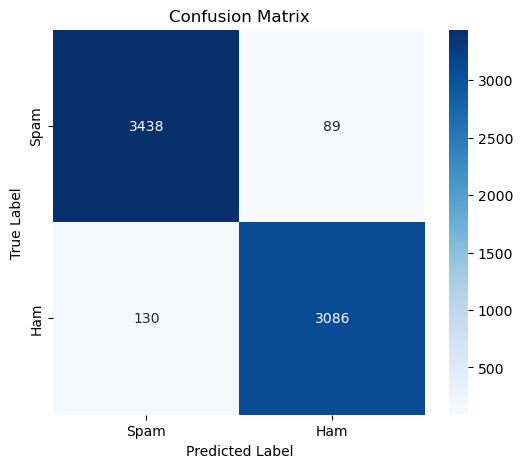

In [84]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy

In [85]:
test_predictions = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Testing Accuracy: 96.75%


Accuracy

In [86]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")


Accuracy: 96.75%
Precision: 97.20%
Recall: 95.96%
F1 Score: 96.57%


learning curve

In [87]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train_tfidf,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)


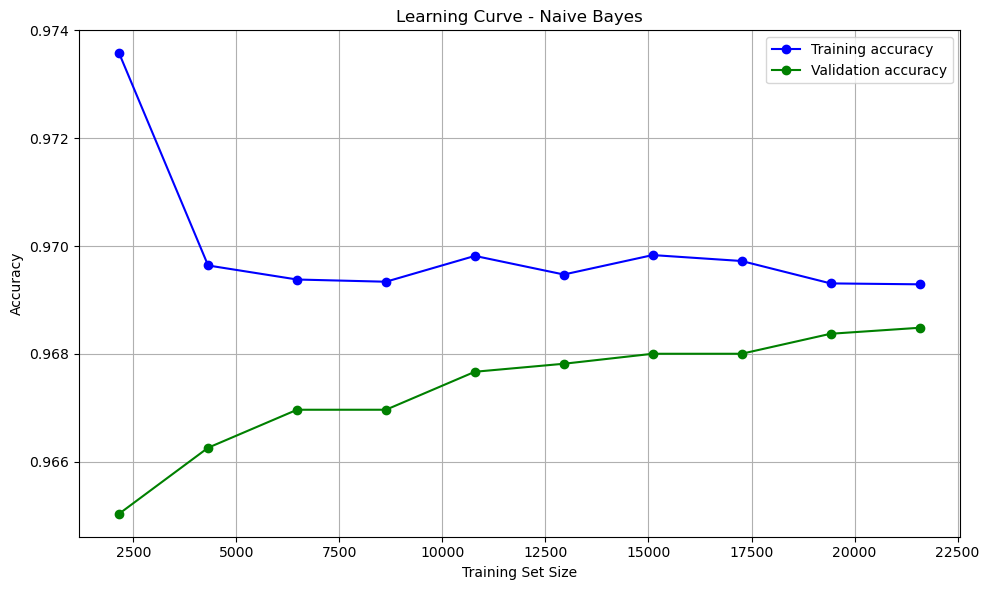

In [45]:
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation accuracy')
plt.title('Learning Curve - Naive Bayes')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

GUI

In [46]:
import tkinter as tk
from tkinter import messagebox
def predict_email(email_text, model, vectorizer):
    clean_input = preprocess_text(email_text)
    clean_input = ' '.join(clean_input)
    input_tfidf = vectorizer.transform([clean_input])
    prediction = model.predict(input_tfidf)[0]
    if prediction == 1:
        return "Ham"
    else:
        return "Spam"


Eamples of Emails as a input:
1-You've been selected for a special cash reward!
2-Act now to double your income! Limited spots available.
3-Don't forget about the team lunch tomorrow afternoon
3-URGENT: Your PayPal account has been locked. Verify now!

In [47]:
def animate_title():
    text = "Spam Email Detector"
    for i in range(len(text) + 1):
        title_label.config(text=text[:i])
        root.update()
        time.sleep(0.05)

def predict_button_clicked():
    email_text = text_input.get("1.0", tk.END).strip()
    if email_text == "":
        messagebox.showwarning("Warning", "Please enter an email text!")
    else:
        result = predict_email(email_text, model, vectorizer)  
        if result == "Ham":
            color = "#4CAF50"
        else:
            color = "#F44336"
        
        
        result_label.config(text="Analyzing...", fg="#888")
        root.update()
        time.sleep(0.8)
        
        result_label.config(text=f"Result: {result}", fg=color)


root = tk.Tk()
root.title("Spam Email Detector 🛡️")
root.geometry("700x600")
root.configure(bg="#ECECEC")


title_label = tk.Label(root, text="", font=("Helvetica", 28, "bold"), bg="#ECECEC", fg="#333")
title_label.pack(pady=20)
root.after(100, animate_title)


subtitle_label = tk.Label(root, text="Check if an email is Spam or not!", font=("Helvetica", 14), bg="#ECECEC", fg="#666")
subtitle_label.pack(pady=5)


label = tk.Label(root, text="Enter Email Text:", font=("Helvetica", 16), bg="#ECECEC", fg="#444")
label.pack(pady=10)

text_input = tk.Text(root, height=12, width=70, font=("Helvetica", 12))
text_input.pack(pady=10)

# Predict Button
predict_button = tk.Button(root, text="Predict", command=predict_button_clicked, font=("Helvetica", 16, "bold"),
                           bg="#2196F3", fg="white", padx=20, pady=10, relief="raised", bd=4)
predict_button.pack(pady=20)

# Result Label
result_label = tk.Label(root, text="", font=("Helvetica", 18, "bold"), bg="#ECECEC")
result_label.pack(pady=20)

root.mainloop()
